Basketball pass

In [1]:
import numpy as np
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

path = "bball/fast/100000000"

In [2]:
with open (os.path.join(path, 'line_count.pkl'), 'rb') as fp:
    line_count = pickle.load(fp)

In [3]:
len(line_count)

123642

(616, 1)
(616, 130)


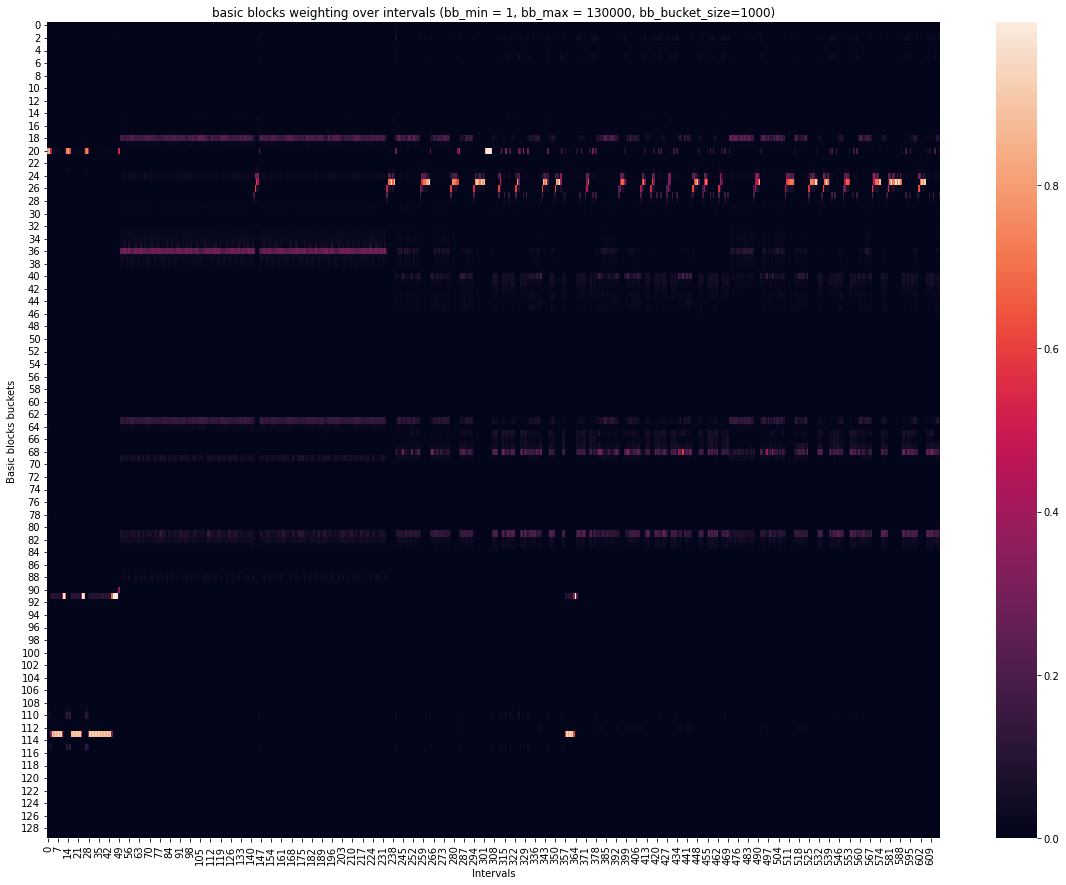

In [4]:

#import matplotlib.colors as mcolors

#colors = mcolors.TABLEAU_COLORS #dictionary of all colors
cmap = matplotlib.cm.get_cmap("viridis")

#sort them by hsv
#by_hsv = [(tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
#                for name, color in colors.items()]
#sorted_names = [name for hsv, name in by_hsv]
#sorted_names.extend(["lime", "darkorange"])
bb_min = 1
granularity = 1000
bb_max = 130000

num_buckets = int((bb_max - bb_min) / granularity) + ((bb_max - bb_min) % granularity > 0)
bars = []

with open(os.path.join(path, "count.bb")) as f:
    for line in f.readlines():
        bins = [0 for _ in range(num_buckets)]
        if line[0] != 'T':
            continue

        for bb_entry in line[1:].split(" "):
            if len(bb_entry[1:].split(":")) != 2:
                continue
            bb = int(bb_entry[1:].split(":")[0])
            if bb < bb_min or bb > bb_max:
                continue
            count = bb_entry[1:].split(":")[1]
            bb_idx = int((bb - bb_min) / granularity)
            if (bb > len(line_count)):
                bins[bb_idx] += int(count)
            else:
                bins[bb_idx] += int(count) * line_count[bb]
        bars.append(bins)

mat = np.array(bars);
row_sums = mat.sum(axis=1).reshape(mat.shape[0], 1)
print(row_sums.shape)
print(mat.shape)
normalized_mat = mat / row_sums
normalized_mat = normalized_mat.transpose()
# transpose so that bucked is on the main axis

df = pd.DataFrame(normalized_mat)
# df.plot(kind="bar", stacked=True, figsize=(8, 6), legend=False)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df, ax=ax)

plt.xlabel("Intervals")
plt.ylabel("Basic blocks buckets")
plt.title("basic blocks weighting over intervals (bb_min = {}, bb_max = {}, bb_bucket_size={})".format(bb_min, bb_max, granularity))
plt.show()

Bus Video:


(6105, 1)
(6105, 130)


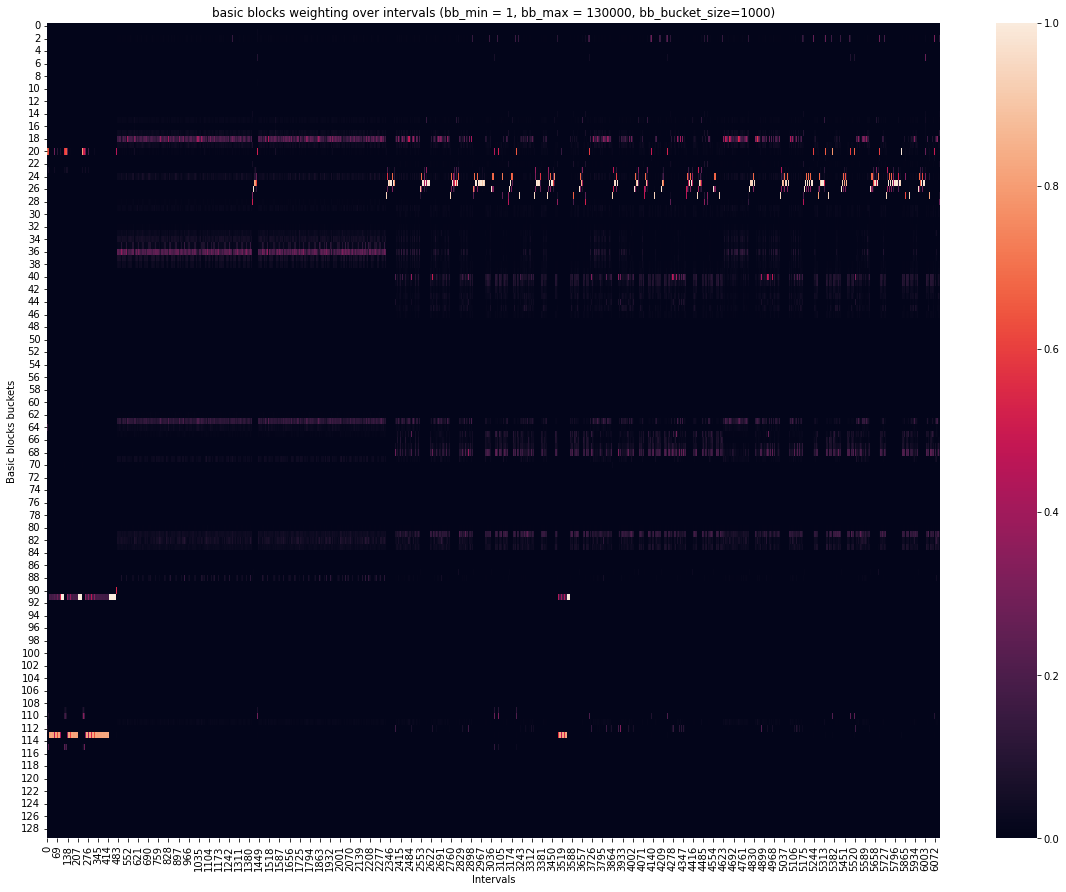

In [5]:
#colors = mcolors.TABLEAU_COLORS #dictionary of all colors
cmap = matplotlib.cm.get_cmap("viridis")

#sort them by hsv
#by_hsv = [(tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
#                for name, color in colors.items()]
#sorted_names = [name for hsv, name in by_hsv]
#sorted_names.extend(["lime", "darkorange"])
bb_min = 1
granularity = 1000
bb_max = 130000

num_buckets = int((bb_max - bb_min) / granularity) + ((bb_max - bb_min) % granularity > 0)
bars = []

# if len(sys.argv) < 1:
#     print("Usage ./viz_simpoints.py *.bb")
#     exit(1)

file = "bball/fast/10000000/count.bb"
with open(file) as f:
    for line in f.readlines():
        bins = [0 for _ in range(num_buckets)]
        if line[0] != 'T':
            continue

        for bb_entry in line[1:].split(" "):
            if len(bb_entry[1:].split(":")) != 2:
                continue
            bb = int(bb_entry[1:].split(":")[0])
            if bb < bb_min or bb > bb_max:
                continue
            count = bb_entry[1:].split(":")[1]
            bb_idx = int((bb - bb_min) / granularity)
            bins[bb_idx] += int(count)
        bars.append(bins)

mat = np.array(bars);
row_sums = mat.sum(axis=1).reshape(mat.shape[0], 1)
print(row_sums.shape)
print(mat.shape)
normalized_mat = mat / row_sums
normalized_mat = normalized_mat.transpose()
# transpose so that bucked is on the main axis

df = pd.DataFrame(normalized_mat)
# df.plot(kind="bar", stacked=True, figsize=(8, 6), legend=False)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df, ax=ax)

plt.xlabel("Intervals")
plt.ylabel("Basic blocks buckets")
plt.title("basic blocks weighting over intervals (bb_min = {}, bb_max = {}, bb_bucket_size={})".format(bb_min, bb_max, granularity))
plt.show()

(600, 1)
(600, 130)


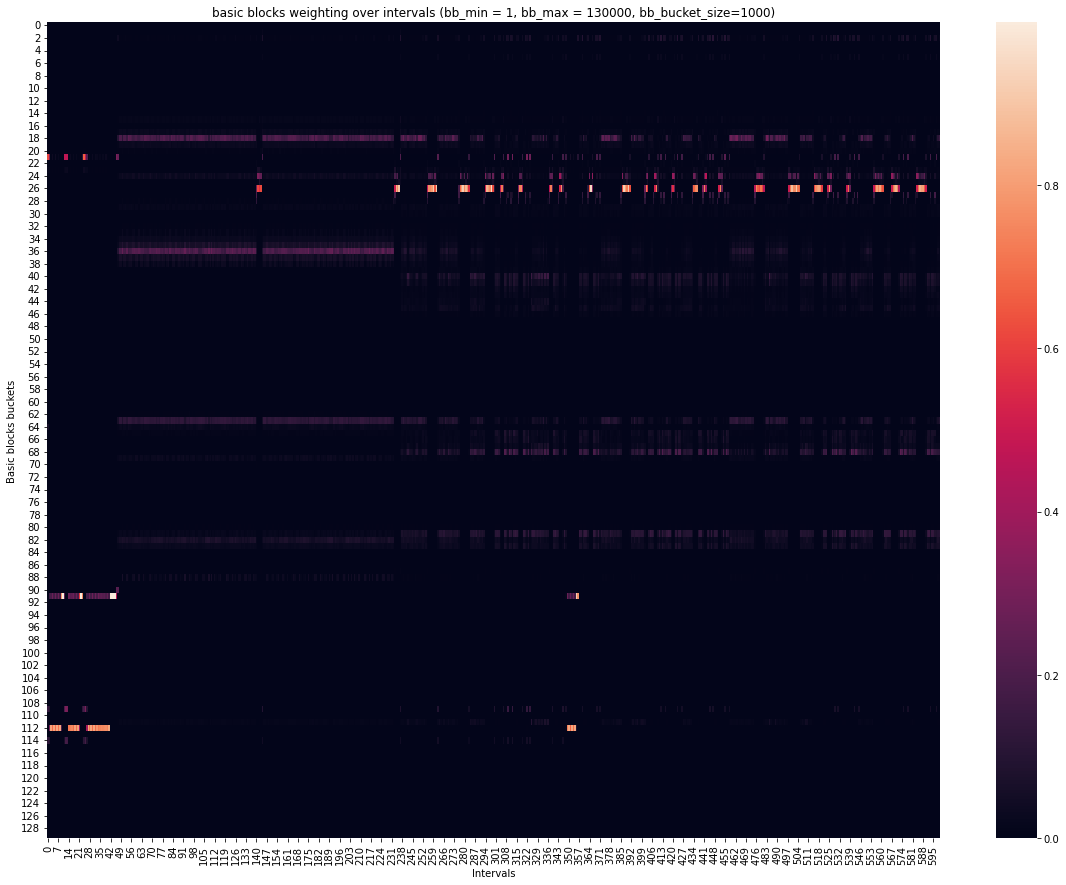

In [3]:
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import matplotlib.colors as mcolors

#colors = mcolors.TABLEAU_COLORS #dictionary of all colors
cmap = matplotlib.cm.get_cmap("viridis")

#sort them by hsv
#by_hsv = [(tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
#                for name, color in colors.items()]
#sorted_names = [name for hsv, name in by_hsv]
#sorted_names.extend(["lime", "darkorange"])
bb_min = 1
granularity = 1000
bb_max = 130000

num_buckets = int((bb_max - bb_min) / granularity) + ((bb_max - bb_min) % granularity > 0)
bars = []

# if len(sys.argv) < 1:
#     print("Usage ./viz_simpoints.py *.bb")
#     exit(1)

file = "bball/fast/100000000/count.bb"
with open(file) as f:
    for line in f.readlines():
        bins = [0 for _ in range(num_buckets)]
        if line[0] != 'T':
            continue

        for bb_entry in line[1:].split(" "):
            if len(bb_entry[1:].split(":")) != 2:
                continue
            bb = int(bb_entry[1:].split(":")[0])
            if bb < bb_min or bb > bb_max:
                continue
            count = bb_entry[1:].split(":")[1]
            bb_idx = int((bb - bb_min) / granularity)
            bins[bb_idx] += int(count)
        bars.append(bins)

mat = np.array(bars);
row_sums = mat.sum(axis=1).reshape(mat.shape[0], 1)
print(row_sums.shape)
print(mat.shape)
normalized_mat = mat / row_sums
normalized_mat = normalized_mat.transpose()
# transpose so that bucked is on the main axis

df = pd.DataFrame(normalized_mat)
# df.plot(kind="bar", stacked=True, figsize=(8, 6), legend=False)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df, ax=ax)

plt.xlabel("Intervals")
plt.ylabel("Basic blocks buckets")
plt.title("basic blocks weighting over intervals (bb_min = {}, bb_max = {}, bb_bucket_size={})".format(bb_min, bb_max, granularity))
plt.show()

Bus

In [ ]:
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import matplotlib.colors as mcolors

#colors = mcolors.TABLEAU_COLORS #dictionary of all colors
cmap = matplotlib.cm.get_cmap("viridis")

#sort them by hsv
#by_hsv = [(tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
#                for name, color in colors.items()]
#sorted_names = [name for hsv, name in by_hsv]
#sorted_names.extend(["lime", "darkorange"])
bb_min = 1
granularity = 1000
bb_max = 130000

num_buckets = int((bb_max - bb_min) / granularity) + ((bb_max - bb_min) % granularity > 0)
bars = []

# if len(sys.argv) < 1:
#     print("Usage ./viz_simpoints.py *.bb")
#     exit(1)

file = "bus/fast/1000000/count.bb"
with open(file) as f:
    for line in f.readlines():
        bins = [0 for _ in range(num_buckets)]
        if line[0] != 'T':
            continue

        for bb_entry in line[1:].split(" "):
            if len(bb_entry[1:].split(":")) != 2:
                continue
            bb = int(bb_entry[1:].split(":")[0])
            if bb < bb_min or bb > bb_max:
                continue
            count = bb_entry[1:].split(":")[1]
            bb_idx = int((bb - bb_min) / granularity)
            bins[bb_idx] += int(count)
        bars.append(bins)

mat = np.array(bars);
row_sums = mat.sum(axis=1).reshape(mat.shape[0], 1)
print(row_sums.shape)
print(mat.shape)
normalized_mat = mat / row_sums
normalized_mat = normalized_mat.transpose()
# transpose so that bucked is on the main axis

df = pd.DataFrame(normalized_mat)
# df.plot(kind="bar", stacked=True, figsize=(8, 6), legend=False)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df, ax=ax)

plt.xlabel("Intervals")
plt.ylabel("Basic blocks buckets")
plt.title("basic blocks weighting over intervals (bb_min = {}, bb_max = {}, bb_bucket_size={})".format(bb_min, bb_max, granularity))
plt.show()

(30289, 1)
(30289, 130)


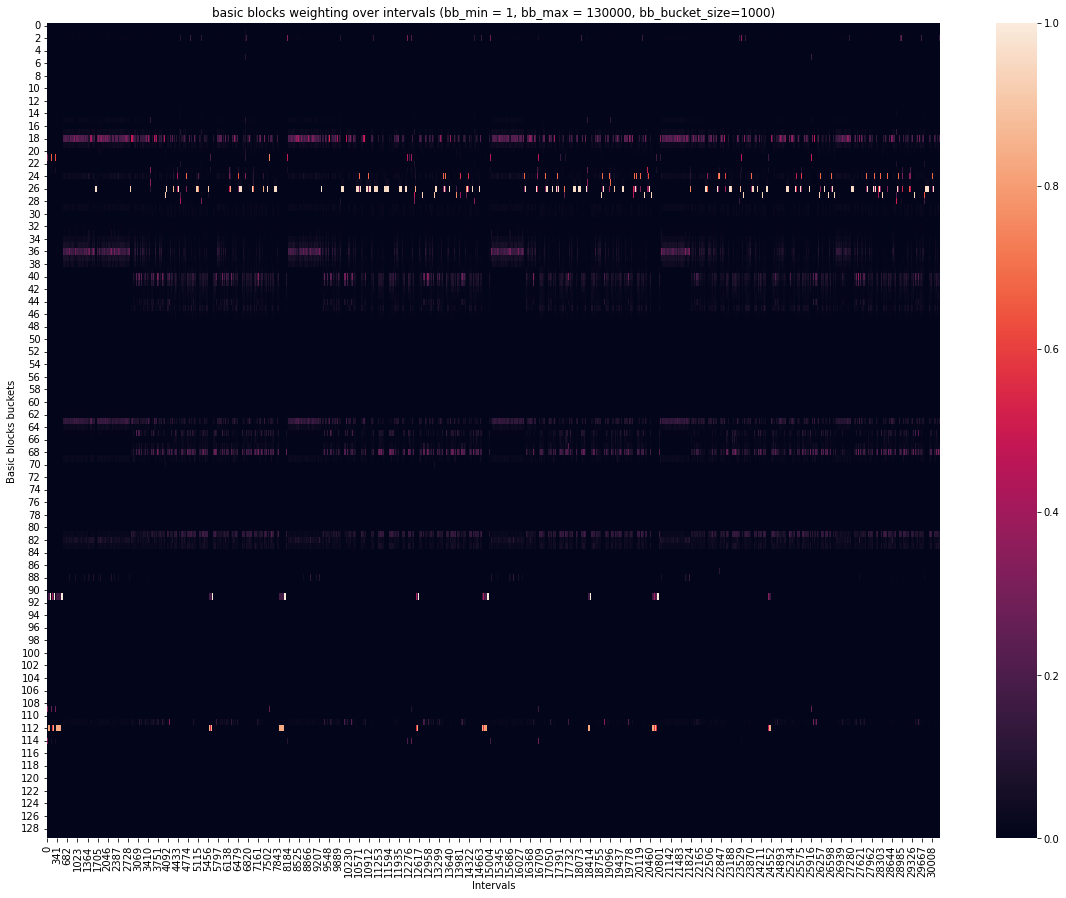

In [4]:
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import matplotlib.colors as mcolors

#colors = mcolors.TABLEAU_COLORS #dictionary of all colors
cmap = matplotlib.cm.get_cmap("viridis")

#sort them by hsv
#by_hsv = [(tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
#                for name, color in colors.items()]
#sorted_names = [name for hsv, name in by_hsv]
#sorted_names.extend(["lime", "darkorange"])
bb_min = 1
granularity = 1000
bb_max = 130000

num_buckets = int((bb_max - bb_min) / granularity) + ((bb_max - bb_min) % granularity > 0)
bars = []

# if len(sys.argv) < 1:
#     print("Usage ./viz_simpoints.py *.bb")
#     exit(1)

file = "bus/fast/10000000/count.bb"
with open(file) as f:
    for line in f.readlines():
        bins = [0 for _ in range(num_buckets)]
        if line[0] != 'T':
            continue

        for bb_entry in line[1:].split(" "):
            if len(bb_entry[1:].split(":")) != 2:
                continue
            bb = int(bb_entry[1:].split(":")[0])
            if bb < bb_min or bb > bb_max:
                continue
            count = bb_entry[1:].split(":")[1]
            bb_idx = int((bb - bb_min) / granularity)
            bins[bb_idx] += int(count)
        bars.append(bins)

mat = np.array(bars);
row_sums = mat.sum(axis=1).reshape(mat.shape[0], 1)
print(row_sums.shape)
print(mat.shape)
normalized_mat = mat / row_sums
normalized_mat = normalized_mat.transpose()
# transpose so that bucked is on the main axis

df = pd.DataFrame(normalized_mat)
# df.plot(kind="bar", stacked=True, figsize=(8, 6), legend=False)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df, ax=ax)

plt.xlabel("Intervals")
plt.ylabel("Basic blocks buckets")
plt.title("basic blocks weighting over intervals (bb_min = {}, bb_max = {}, bb_bucket_size={})".format(bb_min, bb_max, granularity))
plt.show()

(3040, 1)
(3040, 130)


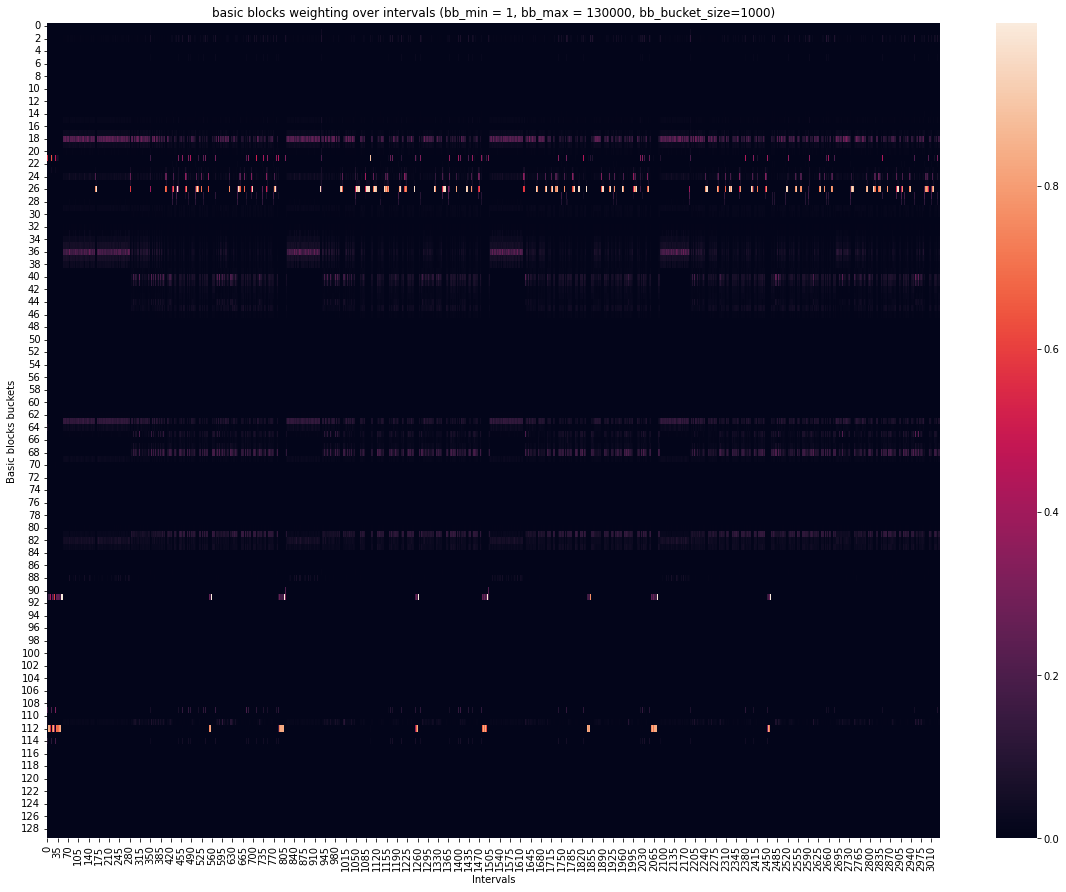

In [5]:
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import matplotlib.colors as mcolors

#colors = mcolors.TABLEAU_COLORS #dictionary of all colors
cmap = matplotlib.cm.get_cmap("viridis")

#sort them by hsv
#by_hsv = [(tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
#                for name, color in colors.items()]
#sorted_names = [name for hsv, name in by_hsv]
#sorted_names.extend(["lime", "darkorange"])
bb_min = 1
granularity = 1000
bb_max = 130000

num_buckets = int((bb_max - bb_min) / granularity) + ((bb_max - bb_min) % granularity > 0)
bars = []

# if len(sys.argv) < 1:
#     print("Usage ./viz_simpoints.py *.bb")
#     exit(1)

file = "bus/fast/100000000/count.bb"
with open(file) as f:
    for line in f.readlines():
        bins = [0 for _ in range(num_buckets)]
        if line[0] != 'T':
            continue

        for bb_entry in line[1:].split(" "):
            if len(bb_entry[1:].split(":")) != 2:
                continue
            bb = int(bb_entry[1:].split(":")[0])
            if bb < bb_min or bb > bb_max:
                continue
            count = bb_entry[1:].split(":")[1]
            bb_idx = int((bb - bb_min) / granularity)
            bins[bb_idx] += int(count)
        bars.append(bins)

mat = np.array(bars);
row_sums = mat.sum(axis=1).reshape(mat.shape[0], 1)
print(row_sums.shape)
print(mat.shape)
normalized_mat = mat / row_sums
normalized_mat = normalized_mat.transpose()
# transpose so that bucked is on the main axis

df = pd.DataFrame(normalized_mat)
# df.plot(kind="bar", stacked=True, figsize=(8, 6), legend=False)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df, ax=ax)

plt.xlabel("Intervals")
plt.ylabel("Basic blocks buckets")
plt.title("basic blocks weighting over intervals (bb_min = {}, bb_max = {}, bb_bucket_size={})".format(bb_min, bb_max, granularity))
plt.show()

(34, 1)
(34, 130)


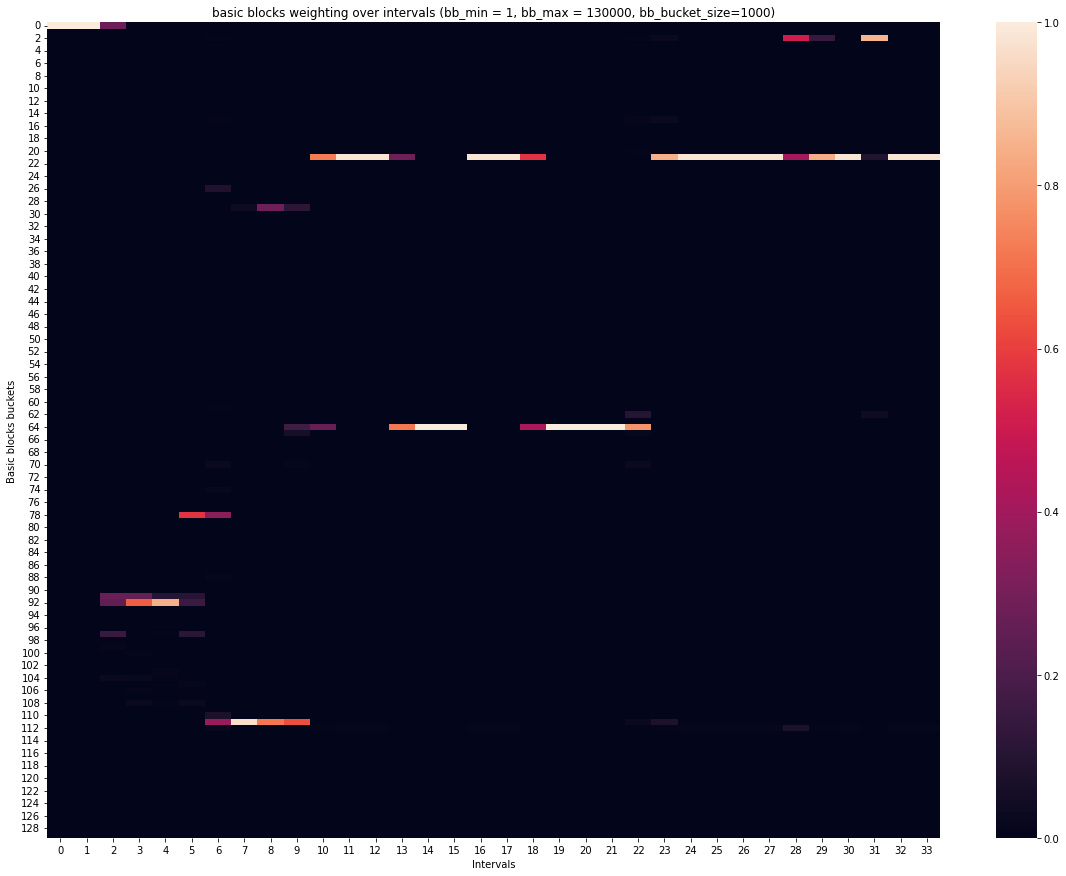

In [8]:
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import matplotlib.colors as mcolors

#colors = mcolors.TABLEAU_COLORS #dictionary of all colors
cmap = matplotlib.cm.get_cmap("viridis")

#sort them by hsv
#by_hsv = [(tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
#                for name, color in colors.items()]
#sorted_names = [name for hsv, name in by_hsv]
#sorted_names.extend(["lime", "darkorange"])
bb_min = 1
granularity = 1000
bb_max = 130000

num_buckets = int((bb_max - bb_min) / granularity) + ((bb_max - bb_min) % granularity > 0)
bars = []

# if len(sys.argv) < 1:
#     print("Usage ./viz_simpoints.py *.bb")
#     exit(1)

file = "paris/fast/100000000/count.bb"
with open(file) as f:
    for line in f.readlines():
        bins = [0 for _ in range(num_buckets)]
        if line[0] != 'T':
            continue

        for bb_entry in line[1:].split(" "):
            if len(bb_entry[1:].split(":")) != 2:
                continue
            bb = int(bb_entry[1:].split(":")[0])
            if bb < bb_min or bb > bb_max:
                continue
            count = bb_entry[1:].split(":")[1]
            bb_idx = int((bb - bb_min) / granularity)
            bins[bb_idx] += int(count)
        bars.append(bins)

mat = np.array(bars);
row_sums = mat.sum(axis=1).reshape(mat.shape[0], 1)
print(row_sums.shape)
print(mat.shape)
normalized_mat = mat / row_sums
normalized_mat = normalized_mat.transpose()
# transpose so that bucked is on the main axis

df = pd.DataFrame(normalized_mat)
# df.plot(kind="bar", stacked=True, figsize=(8, 6), legend=False)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df, ax=ax)

plt.xlabel("Intervals")
plt.ylabel("Basic blocks buckets")
plt.title("basic blocks weighting over intervals (bb_min = {}, bb_max = {}, bb_bucket_size={})".format(bb_min, bb_max, granularity))
plt.show()

(3, 1)
(3, 130)


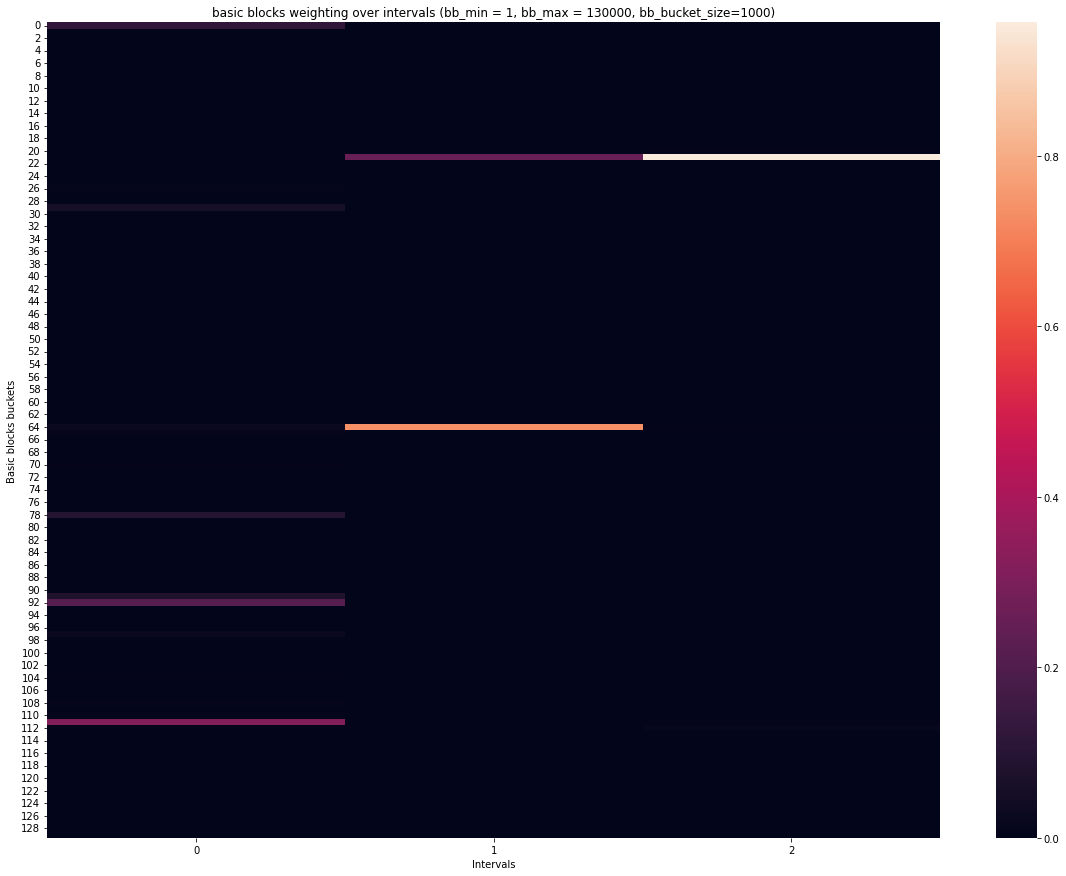

In [9]:
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import matplotlib.colors as mcolors

#colors = mcolors.TABLEAU_COLORS #dictionary of all colors
cmap = matplotlib.cm.get_cmap("viridis")

#sort them by hsv
#by_hsv = [(tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
#                for name, color in colors.items()]
#sorted_names = [name for hsv, name in by_hsv]
#sorted_names.extend(["lime", "darkorange"])
bb_min = 1
granularity = 1000
bb_max = 130000

num_buckets = int((bb_max - bb_min) / granularity) + ((bb_max - bb_min) % granularity > 0)
bars = []

# if len(sys.argv) < 1:
#     print("Usage ./viz_simpoints.py *.bb")
#     exit(1)

file = "paris/fast/10000000/count.bb"
with open(file) as f:
    for line in f.readlines():
        bins = [0 for _ in range(num_buckets)]
        if line[0] != 'T':
            continue

        for bb_entry in line[1:].split(" "):
            if len(bb_entry[1:].split(":")) != 2:
                continue
            bb = int(bb_entry[1:].split(":")[0])
            if bb < bb_min or bb > bb_max:
                continue
            count = bb_entry[1:].split(":")[1]
            bb_idx = int((bb - bb_min) / granularity)
            bins[bb_idx] += int(count)
        bars.append(bins)

mat = np.array(bars);
row_sums = mat.sum(axis=1).reshape(mat.shape[0], 1)
print(row_sums.shape)
print(mat.shape)
normalized_mat = mat / row_sums
normalized_mat = normalized_mat.transpose()
# transpose so that bucked is on the main axis

df = pd.DataFrame(normalized_mat)
# df.plot(kind="bar", stacked=True, figsize=(8, 6), legend=False)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df, ax=ax)

plt.xlabel("Intervals")
plt.ylabel("Basic blocks buckets")
plt.title("basic blocks weighting over intervals (bb_min = {}, bb_max = {}, bb_bucket_size={})".format(bb_min, bb_max, granularity))
plt.show()

(32, 1)
(32, 130)


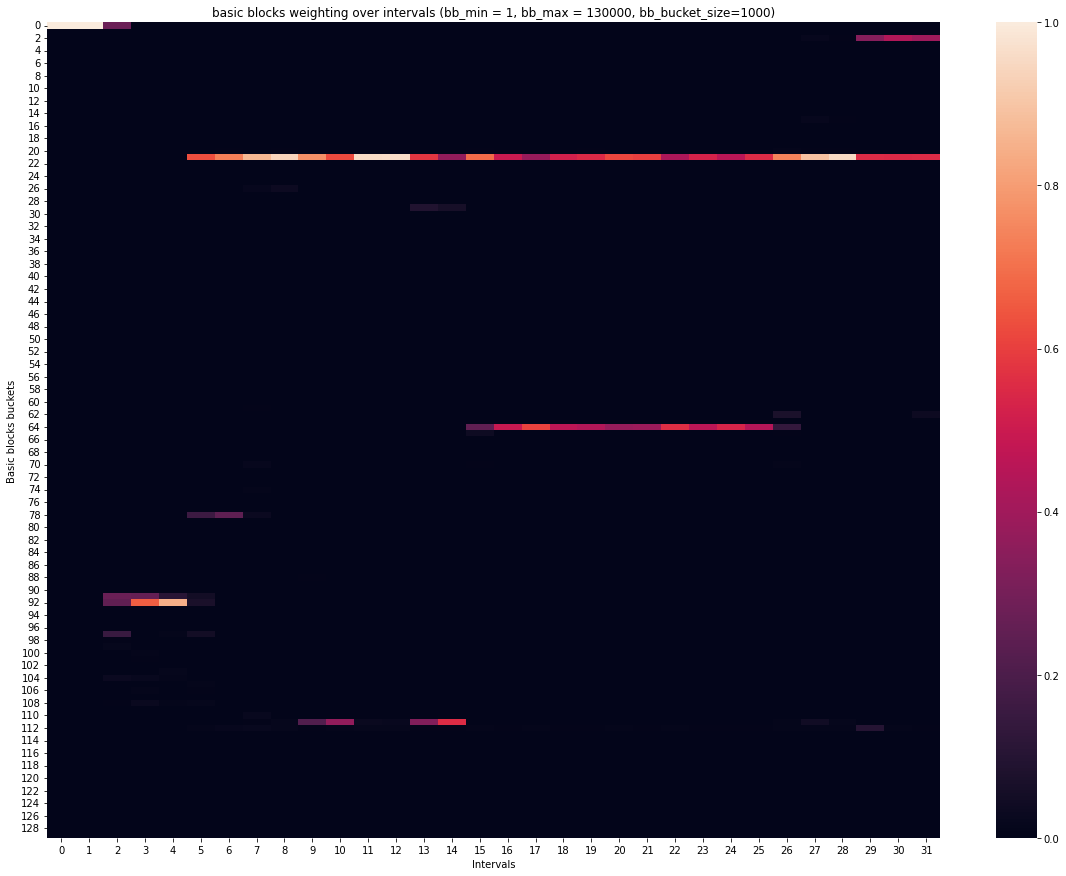

In [10]:
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import matplotlib.colors as mcolors

#colors = mcolors.TABLEAU_COLORS #dictionary of all colors
cmap = matplotlib.cm.get_cmap("viridis")

#sort them by hsv
#by_hsv = [(tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
#                for name, color in colors.items()]
#sorted_names = [name for hsv, name in by_hsv]
#sorted_names.extend(["lime", "darkorange"])
bb_min = 1
granularity = 1000
bb_max = 130000

num_buckets = int((bb_max - bb_min) / granularity) + ((bb_max - bb_min) % granularity > 0)
bars = []

# if len(sys.argv) < 1:
#     print("Usage ./viz_simpoints.py *.bb")
#     exit(1)

file = "paris/fast/1000000/count.bb"
with open(file) as f:
    for line in f.readlines():
        bins = [0 for _ in range(num_buckets)]
        if line[0] != 'T':
            continue

        for bb_entry in line[1:].split(" "):
            if len(bb_entry[1:].split(":")) != 2:
                continue
            bb = int(bb_entry[1:].split(":")[0])
            if bb < bb_min or bb > bb_max:
                continue
            count = bb_entry[1:].split(":")[1]
            bb_idx = int((bb - bb_min) / granularity)
            bins[bb_idx] += int(count)
        bars.append(bins)

mat = np.array(bars);
row_sums = mat.sum(axis=1).reshape(mat.shape[0], 1)
print(row_sums.shape)
print(mat.shape)
normalized_mat = mat / row_sums
normalized_mat = normalized_mat.transpose()
# transpose so that bucked is on the main axis

df = pd.DataFrame(normalized_mat)
# df.plot(kind="bar", stacked=True, figsize=(8, 6), legend=False)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df, ax=ax)

plt.xlabel("Intervals")
plt.ylabel("Basic blocks buckets")
plt.title("basic blocks weighting over intervals (bb_min = {}, bb_max = {}, bb_bucket_size={})".format(bb_min, bb_max, granularity))
plt.show()